<h2>Exploratory Data Analysis</h2>

In [2]:
import sys
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split

sys.path.append(str(Path().resolve().parent))
from src.text_preprocessing import get_processed_data

In [3]:

processed_data = get_processed_data()
processed_data

Text preprocessing completed in 10.71 seconds


,ID,Text,Gene,Variation,Class
0,0,cyclin dependent kinases cdks regulate variety...,FAM58A,Truncating Mutations,1
1,1,abstract background non small cell lung cancer...,CBL,W802*,2
2,2,abstract background non small cell lung cancer...,CBL,Q249E,2
3,3,recent evidence demonstrated acquired uniparen...,CBL,N454D,3
4,4,oncogenic mutations monomeric casitas b lineag...,CBL,L399V,4
...,...,...,...,...,...
3316,3316,introduction myelodysplastic syndromes mds het...,RUNX1,D171N,4
3317,3317,introduction myelodysplastic syndromes mds het...,RUNX1,A122*,1
3318,3318,runt related transcription factor 1 gene runx1...,RUNX1,Fusions,1
3319,3319,runx1 aml1 gene frequent target chromosomal tr...,RUNX1,R80C,4


In [4]:
class_counts = processed_data["Class"].value_counts().sort_index()
class_counts

Class
1    566
2    452
3     89
4    686
5    242
6    273
7    952
8     19
9     37
Name: count, dtype: int64

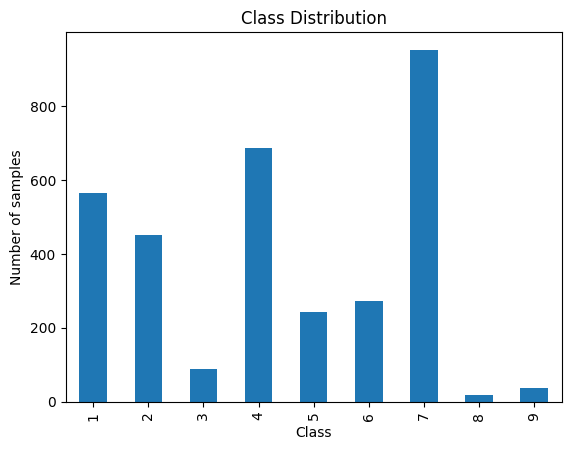

In [5]:


plt.figure()
class_counts.plot(kind="bar")
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.title("Class Distribution")
plt.show()


In [6]:
class_distribution = pd.DataFrame({
    "count": processed_data["Class"].value_counts().sort_index(),
    "percentage": (
        processed_data["Class"]
        .value_counts(normalize=True)
        .sort_index()
        * 100
    ).round(2)
})

class_distribution


,count,percentage
Class,,
1,566,17.07
2,452,13.63
3,89,2.68
4,686,20.69
5,242,7.30
6,273,8.23
7,952,28.71
8,19,0.57
9,37,1.12


Imbalanced data
- Class 7 has the highest distribution with 28.71%
- Class 9 has the lowest distribution with 1.12%


<h3>Data splitting</h3>

Split data into train, test and cross validation data in 64, 20 and 16 % respectively

In [ ]:
y_true = processed_data['Class'].values
processed_data.Gene      = processed_data.Gene.str.replace(r'\s+', '_')
processed_data.Variation = processed_data.Variation.str.replace(r'\s+', '_')


# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(processed_data, y_true, stratify=y_true, test_size=0.2)

# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

# here y_train, y_test and y_cv are used to find out training, test and cross validation loss and accuracy or other performance index

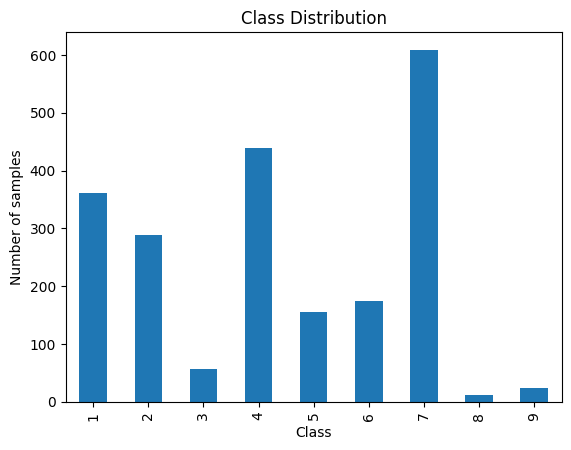

,count,percentage
Class,,
1,362,17.07
2,289,13.63
3,57,2.68
4,439,20.69
5,155,7.30
6,174,8.23
7,609,28.71
8,12,0.57
9,24,1.12


In [19]:
# train df distribution
class_counts = train_df["Class"].value_counts().sort_index()
plt.figure()
class_counts.plot(kind="bar")
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.title("Class Distribution")
plt.show()

class_distribution = pd.DataFrame({
    "count": class_counts,
    "percentage": (
        processed_data["Class"]
        .value_counts(normalize=True)
        .sort_index()
        * 100
    ).round(2)
})

class_distribution

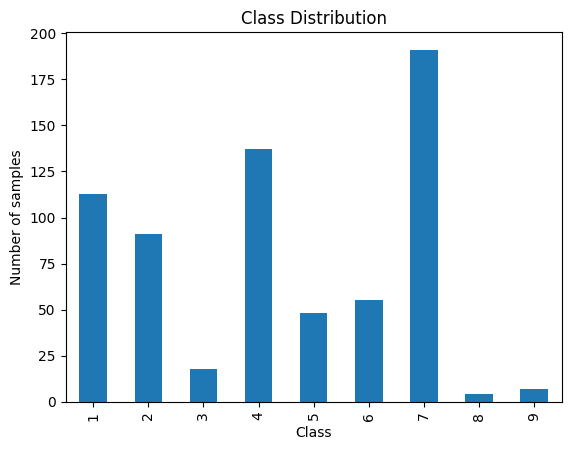

,count,percentage
Class,,
1,113,17.07
2,91,13.63
3,18,2.68
4,137,20.69
5,48,7.30
6,55,8.23
7,191,28.71
8,4,0.57
9,7,1.12


In [20]:
class_counts = test_df["Class"].value_counts().sort_index()
plt.figure()
class_counts.plot(kind="bar")
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.title("Class Distribution")
plt.show()

class_distribution = pd.DataFrame({
    "count": class_counts,
    "percentage": (
        processed_data["Class"]
        .value_counts(normalize=True)
        .sort_index()
        * 100
    ).round(2)
})

class_distribution

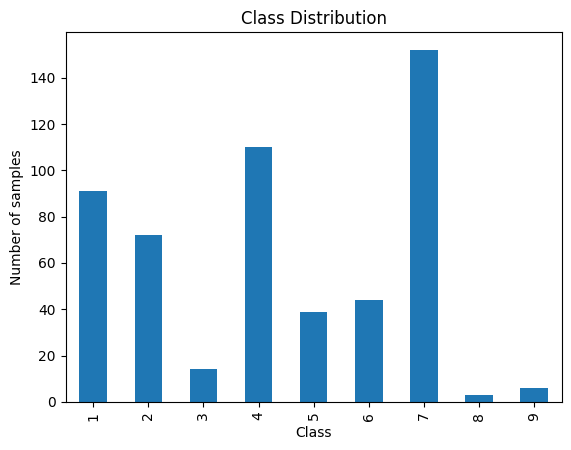

,count,percentage
Class,,
1,91,17.07
2,72,13.63
3,14,2.68
4,110,20.69
5,39,7.30
6,44,8.23
7,152,28.71
8,3,0.57
9,6,1.12


In [21]:
class_counts = cv_df["Class"].value_counts().sort_index()
plt.figure()
class_counts.plot(kind="bar")
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.title("Class Distribution")
plt.show()

class_distribution = pd.DataFrame({
    "count": class_counts,
    "percentage": (
        processed_data["Class"]
        .value_counts(normalize=True)
        .sort_index()
        * 100
    ).round(2)
})

class_distribution

In [22]:
def class_count_and_percentage(df, class_col="Class"):
    counts = df[class_col].value_counts().sort_index()
    percentages = (counts / counts.sum()) * 100
    return counts, percentages

train_counts, train_pc = class_count_and_percentage(train_df)
test_counts, test_pc = class_count_and_percentage(test_df)
cv_counts, cv_pc = class_count_and_percentage(cv_df)

class_distribution = pd.DataFrame({
    "count_train": train_counts,
    "count_test": test_counts,
    "count_cv": cv_counts,
    "pc_train": train_pc,
    "pc_test": test_pc,
    "pc_cv": cv_pc
}).fillna(0)


class_distribution[["pc_train", "pc_test", "pc_cv"]] = (
    class_distribution[["pc_train", "pc_test", "pc_cv"]].round(2)
)
class_distribution




,count_train,count_test,count_cv,pc_train,pc_test,pc_cv
Class,,,,,,
1,362,113,91,17.07,17.02,17.14
2,289,91,72,13.63,13.70,13.56
3,57,18,14,2.69,2.71,2.64
4,439,137,110,20.70,20.63,20.72
5,155,48,39,7.31,7.23,7.34
6,174,55,44,8.20,8.28,8.29
7,609,191,152,28.71,28.77,28.63
8,12,4,3,0.57,0.60,0.56
9,24,7,6,1.13,1.05,1.13


* Distributions of train, test and cross validation data are almost same
* Data are imbalanced